## Title  
  
### Section 1: Different fonts

Regular. __Bold__. _Italic_.  
  

### Section 2: Enumeration
* First Bullet  
* Second Bullet  
    1. A  
    2. B  
* Third Bullet  
    * Sub-bullet  
    * Sub-bullet  
    
    
### Section 3: Code


This is inline code: `[x*x for x in X]`, and this is a block of code (note the syntax highlighting!):
```python
# comment
    def foo(x,y,z):
        return x + 10 * y + 100 * z
```


In [1]:
import numpy as np
a = np.arange(0,1,11)
a

array([0])

### 2. Machine Learning Data Pipeline

#### Data Prep

In [12]:
#read data into DataFrames
import pandas as pd

filename = 'student-mat.csv'
data = pd.read_csv(filename, sep=';')

In [13]:
#use .head() to get a quick look at the data
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
#use .describe() to get statistics about data
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [15]:
#check data types, confirming matches with listed types on the website
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

#### Data Validation

In [16]:
#code from lecture for data validation, checking for null presence in each row
pd3 = pd.isnull(data)
nullrows=[]
for i in range(pd3.shape[0]):
    rowisnull = False
    for j in range(pd3.shape[1]):
        rowisnull = rowisnull or pd3.iloc[i][j]
    if rowisnull is True:
        nullrows+=i
#check for presence of values in nullrows, print out which rows have nulls
if nullrows:
    for i in nullrows:
        print('row ', i, 'has null values')
if not nullrows:
    print('All rows are free of null values!')


All rows are free of null values!


#### Feature Selection

In [17]:
#engineering features, converting unique strings into numerical values
data = data.apply(lambda x: pd.factorize(x)[0])
data.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [18]:
#creating tables with different number of features; selecting 6, 9, and 12 different features
data1 = data[['Medu','Fedu','studytime','schoolsup','paid','absences']]
data2 = data[['Medu','Fedu','studytime','schoolsup','paid','absences','Mjob','Fjob','higher']]
data3 = data[['Medu','Fedu','studytime','schoolsup','paid','absences','Mjob','Fjob','higher','goout','Dalc','famrel']]
#creating target set
target = data['G3']

#### Machine Learning Time!

In [19]:
#function that splits data into training and test, then fits and scores a DecisionTreeClassifier with different max_depth values
#returns a list of accuracy values for each 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error
def dif_depths(data, target, depths):
    mse_scores=[]
    x_train,x_test,y_train,y_test = train_test_split(data,target)
    for depth in depths:
        clf=tree.DecisionTreeClassifier(max_leaf_nodes=depth)
        clf=clf.fit(x_train,y_train)
        prediction = clf.predict(x_test)
        mse = mean_squared_error(y_test, prediction)  #calculate mean squared error, function given by ChatGPT
        mse_scores.append(mse)
    return mse_scores

In [20]:
#define depths to be used, then evaluate and get accuracies for each set of features
depths = [10,50,100]
scores1 = dif_depths(data1,target,depths)
scores2 = dif_depths(data2,target,depths)
scores3 = dif_depths(data3,target,depths)
scoretotal=[scores1,scores2,scores3]
print(scoretotal)

[[41.39393939393939, 41.95959595959596, 43.02020202020202], [42.45454545454545, 40.96969696969697, 47.90909090909091], [41.58585858585859, 43.58585858585859, 41.717171717171716]]


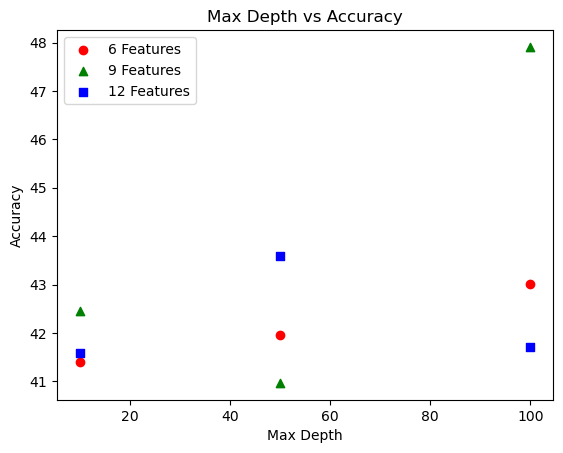

In [21]:
#create plot with each separate dataset which contains different features, label and title graph and show legend
import matplotlib.pyplot as plt #GPT generated starts here
plt.scatter(depths, scores1, c='r', marker='o', label='6 Features')
plt.scatter(depths, scores2, c='g', marker='^', label='9 Features')
plt.scatter(depths, scores3, c='b', marker='s', label='12 Features')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max Depth vs Accuracy')
plt.legend()
plt.show()#GPT generated ends here

## Summary and Notes
In this exercise, using a higher number of features resulted in higher accuracies at higher max depth values. The difference between accuracies using a different number of features is higher at higher max_depth values. Using 12 and 9 features, as max_depth increased, accuracy also increased, however for 6 features accuracy decreased with max_depth increase. All accuracies were also below 50%, meaning bad performance. There were 20 possible target outcomes, however, so this is still above chance. In deciding the features, for the first set of features I went with my gut feeling on what would likely have the greatest impact on grades. I also used factors that have been proven elsewhere to affect academic performance, like the education and job of the parents. Other features like the absences and study time felt like they would have a large impact on grade outcomes. 

This didn't give me any insights into the dataset, as the accuracy of the DecisionTreeClassifier was too low to draw any meaningful conclusions from it's results. In the future, I would try to select some data with higher standard deviation to be used as features, as that may provide the classifier with more information.

A couple outside sources were used in this homework:
* https://www.statology.org/pandas-factorize/
    * this website was used to learn about the pandas function factorize, which was used to assign values to string elements in the original dataset.
* https://chat.openai.com/share/6b16f547-0ddc-4bb6-9d55-3168df1e6a95 
    * ChatGPT was used for some help with the plotting, as well as troubleshooting some of the machine learning code. The attached link contains the    conversation I had with the bot while doing this homework. Specific code provided by ChatGPT is marked as such in comments, and I will explain the usage of code here. Most of the code discussed in the chatlog did not make it into the final version here.
    * The first piece of code I used from ChatGPT is the mean_squared_error function. This function is from the sklearn.metrics library and computes the mean squared error of my DecisionTree. This is used to check the accuracy of my DecisionTree and gives the values used in the plot
    * ChatGPT also generated code to create the 3D plot. The code shown plots 3 scatter plots on the same graph. It takes each dataset and assigns each a unique color and marker to make it identifiable. Then, labels for the axes and a title for the graph are generated. Finally, the legend is generated containing labels corresponding to the number of features in each dataset.